# Tutorial PyTorch:

    1) Regressão Linear

## Importação de Bibliotecas

### Objetivo

Neste notebook, você irá aprender a utilizar o PyTorch para resolver problemas de **regressão linear**. Ao final, será capaz de construir modelos simples e interpretar seus resultados.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Parte 1 – Regressão Linear (y = 2x + 1)

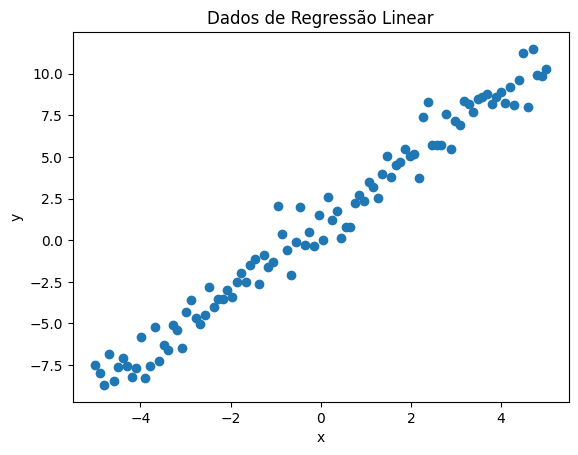

In [2]:
# Dados sintéticos
x = torch.unsqueeze(torch.linspace(-5, 5, 100), dim=1)
y = 2 * x + 1 + 0.9 * torch.randn(x.size())

# Visualização
plt.scatter(x.numpy(), y.numpy())
plt.title("Dados de Regressão Linear")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [3]:
# Modelo linear
class ModeloRegressao(nn.Module):
    def __init__(self):
        super(ModeloRegressao, self).__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)

In [10]:
modelo = ModeloRegressao()
criterio = nn.MSELoss()
otimizador = torch.optim.SGD(modelo.parameters(), lr=0.1)

# Treinamento
for epoca in range(100):
    saida = modelo(x)
    perda = criterio(saida, y)

    otimizador.zero_grad()
    perda.backward()
    otimizador.step()

    if (epoca + 1) % 10 == 0:
        print(f'Época {epoca+1}, Perda: {perda.item():.4f}')

Época 10, Perda: 1.0349
Época 20, Perda: 0.8582
Época 30, Perda: 0.8574
Época 40, Perda: 0.8574
Época 50, Perda: 0.8574
Época 60, Perda: 0.8574
Época 70, Perda: 0.8574
Época 80, Perda: 0.8574
Época 90, Perda: 0.8574
Época 100, Perda: 0.8574


### Exercício 1

Modifique a taxa de aprendizado (`lr`) para `0.001`, `0.01` e `0.1`. Observe como isso afeta a convergência do modelo. Qual taxa parece melhor neste caso?

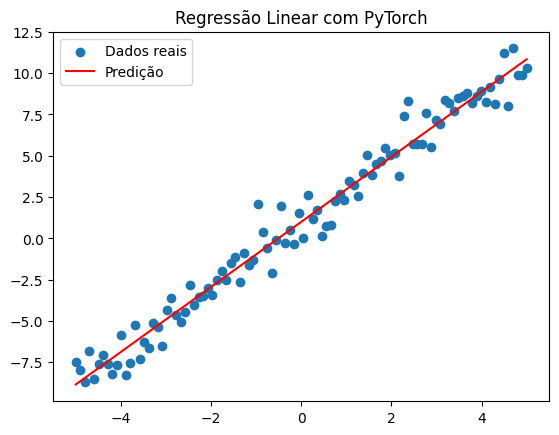

In [11]:
# Visualização dos resultados
plt.scatter(x.numpy(), y.numpy(), label='Dados reais')
plt.plot(x.numpy(), modelo(x).detach().numpy(), color='red', label='Predição')
plt.legend()
plt.title("Regressão Linear com PyTorch")
plt.show()

## Parte 2 – Regressão Não Linear (y = 3x² - 10x + 6)

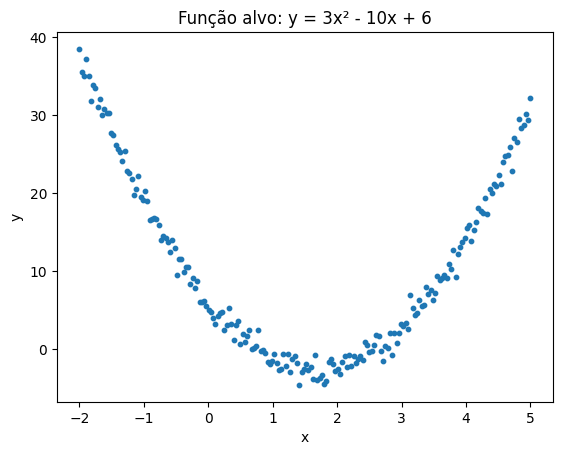

In [12]:
# Dados quadráticos
x = torch.unsqueeze(torch.linspace(-2, 5, 200), dim=1)
y = 3 * x**2 - 10 * x + 6 + 1.0 * torch.randn(x.size())

plt.scatter(x.numpy(), y.numpy(), s=10)
plt.title("Função alvo: y = 3x² - 10x + 6")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Exercício 2

a) Altere a função hipótese do modelo anterior para (y = 3x² - 10x + 6). Descreva se o modelo consegue se ajustar ou se ocorre algum problema.



Época 100, Perda: 7.3553
Época 200, Perda: 8.4203
Época 300, Perda: 5.6983
Época 400, Perda: 4.4850
Época 500, Perda: 3.4672
Época 600, Perda: 2.8183
Época 700, Perda: 2.4713
Época 800, Perda: 2.1594
Época 900, Perda: 2.0898
Época 1000, Perda: 2.0602
Época 1100, Perda: 2.1727
Época 1200, Perda: 1.8301
Época 1300, Perda: 1.5997
Época 1400, Perda: 1.8108
Época 1500, Perda: 1.7327
Época 1600, Perda: 1.7550
Época 1700, Perda: 1.7495
Época 1800, Perda: 1.4520
Época 1900, Perda: 1.4992
Época 2000, Perda: 1.3833


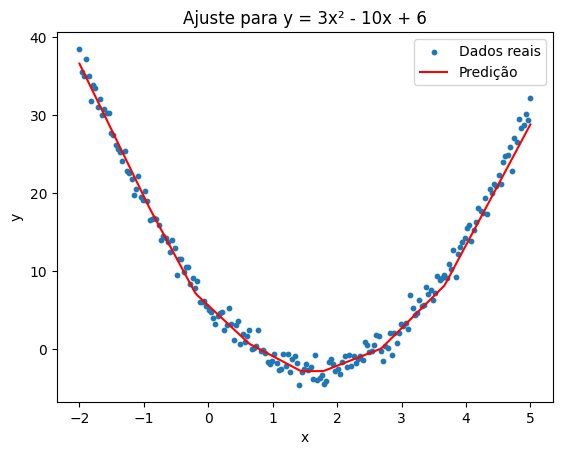

In [17]:
# Coloque seu código aqui
# Modelo linear
class ModeloQuadratico(nn.Module):
    def __init__(self):
        super(ModeloQuadratico, self).__init__()
        self.camada1 = nn.Linear(1, 10)
        self.camada2 = nn.Linear(10, 1)
    def forward(self, x):
      x = torch.relu(self.camada1(x))
      x = self.camada2(x)
      return x

#treina o modelo
modelo = ModeloQuadratico()
criterio = nn.MSELoss()
otimizador = torch.optim.SGD(modelo.parameters(), lr=0.01)

for epoca in range(2000):
  #previsao do modelo
  saida = modelo(x)
  #calcula o erro
  perda = criterio(saida, y)

  #zera os gradientes
  otimizador.zero_grad()
  #retropropagação
  perda.backward()
  #atualizar pesos
  otimizador.step()

  if (epoca + 1) % 100 == 0:
    print(f'Época {epoca+1}, Perda: {perda.item():.4f}')

#visualiza os resultados
plt.scatter(x.numpy(), y.numpy(),s=10, label='Dados reais')
plt.plot(x.numpy(), modelo(x).detach().numpy(), color='red', label='Predição')
plt.title("Ajuste para y = 3x² - 10x + 6")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

b) Agora altere o número de neurônios em cada camada (ex: `32`, `16`, `1`) e descreva o que acontece.

o modelo se adaptou muito quase perfeitamente aos dados e tivemos uma perda baixa o que indica que o modelo esta deesempenhando bem

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([200, 1])) that is different to the input size (torch.Size([200, 16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Época 100, Perda: 28.0170
Época 200, Perda: 18.6104
Época 300, Perda: 11.7222
Época 400, Perda: 7.4945
Época 500, Perda: 5.0433
Época 600, Perda: 3.7104
Época 700, Perda: 3.0039
Época 800, Perda: 2.5213
Época 900, Perda: 2.2172
Época 1000, Perda: 2.0350
Época 1100, Perda: 1.9053
Época 1200, Perda: 1.7805
Época 1300, Perda: 1.6608
Época 1400, Perda: 1.5907
Época 1500, Perda: 1.5126
Época 1600, Perda: 1.4495
Época 1700, Perda: 1.3948
Época 1800, Perda: 1.3553
Época 1900, Perda: 1.3247
Época 2000, Perda: 1.2971


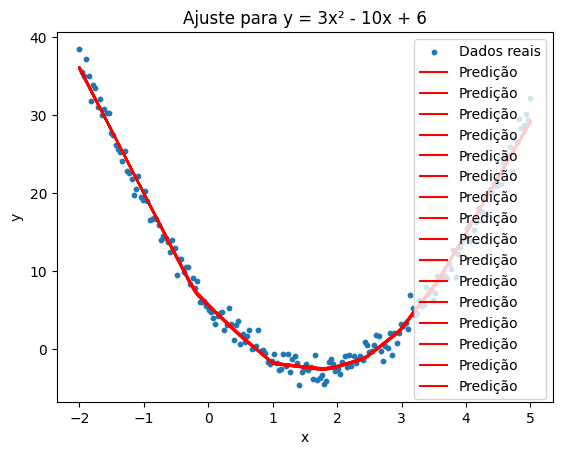

In [21]:
# Coloque seu código aqui
# Modelo linear
class ModeloQuadratico(nn.Module):
    def __init__(self):
        super(ModeloQuadratico, self).__init__()
        self.camada1 = nn.Linear(1, 32)
        self.camada2 = nn.Linear(32, 16)
        self.camada3 = nn.Linear(16, 1)
    def forward(self, x):
      x = torch.relu(self.camada1(x))
      x = self.camada2(x)
      return x

#treina o modelo
modelo = ModeloQuadratico()
criterio = nn.MSELoss()
otimizador = torch.optim.SGD(modelo.parameters(), lr=0.01)

for epoca in range(2000):
  #previsao do modelo
  saida = modelo(x)
  #calcula o erro
  perda = criterio(saida, y)

  #zera os gradientes
  otimizador.zero_grad()
  #retropropagação
  perda.backward()
  #atualizar pesos
  otimizador.step()

  if (epoca + 1) % 100 == 0:
    print(f'Época {epoca+1}, Perda: {perda.item():.4f}')

#visualiza os resultados
plt.scatter(x.numpy(), y.numpy(),s=10, label='Dados reais')
plt.plot(x.numpy(), modelo(x).detach().numpy(), color='red', label='Predição')
plt.title("Ajuste para y = 3x² - 10x + 6")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()